In [3]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [5]:
df = pd.read_csv("test.csv")
df.head()

,MEAN,MAX,MIN,RANGE,KURT,SKEW,MEAN_1ST_GRAD,STD_1ST_GRAD,MEAN_2ND_GRAD,STD_2ND_GRAD,...,MIN_ONSET_LOG,MIN_ONSET_SQRT,MAX_ONSET_LOG,MAX_ONSET_SQRT,STD_ONSET_YEO_JON,MEAN_ONSET_LOG,MEAN_ONSET_SQRT,NasaTLX,subject_id,condition
0,0.000735,0.001764,0.000177,0.001587,0.543036,0.965257,1.850634e-05,0.000306,0.000023,0.000262,...,0.721074,1.027930,3.154608,4.737494,1.456944,1.625915,2.020660,27.6,2.0,2
1,0.000691,0.001764,0.000198,0.001566,0.950346,1.039783,-5.712810e-07,0.000275,0.000003,0.000242,...,0.721074,1.027930,3.084339,4.566512,1.381432,1.583538,1.967781,60.7,1.0,1
2,0.003698,0.010928,0.001505,0.009423,4.888562,2.204727,9.236140e-04,0.004557,-0.002940,0.004265,...,2.529238,3.397638,4.231222,8.234153,2.852115,3.740398,6.412078,62.6,5.0,2
3,0.003681,0.010928,0.001689,0.009239,6.399756,2.479169,-1.615331e-03,0.003109,0.001296,0.002037,...,2.529238,3.397638,4.203095,8.117454,2.521958,3.471639,5.584752,62.6,5.0,2
4,0.002909,0.007620,0.000802,0.006818,0.117454,1.000727,2.749421e-04,0.001386,0.000273,0.001333,...,1.188968,1.511189,3.259410,5.003417,2.003418,2.540301,3.418112,73.0,5.0,0


<AxesSubplot:xlabel='condition', ylabel='count'>

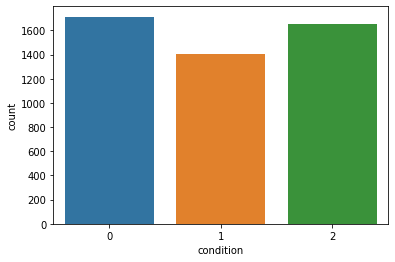

In [6]:
import seaborn as sns
sns.countplot(x='condition', data=df)

In [13]:
df.isnull().sum()

MEAN               0
MAX                0
MIN                0
RANGE              0
KURT               0
                  ..
MEAN_ONSET_LOG     0
MEAN_ONSET_SQRT    0
NasaTLX            0
subject_id         0
condition          0
Length: 61, dtype: int64

In [14]:
df['condition'].unique()

array([2, 1, 0], dtype=int64)

In [15]:
x=df.drop(["condition"]  ,axis=1)
x=x.drop(["subject_id"]  ,axis=1)
x.shape

(4772, 59)

In [16]:
y = df.loc[:,'condition'].values
y.shape

(4772,)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
from keras.utils import to_categorical
y = to_categorical(y)

In [18]:
y

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [20]:
x_train = np.reshape(x_train, (x_train.shape[0],1,x.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,x.shape[1]))

In [21]:
x_train.shape

(3817, 1, 59)

In [168]:
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()

model = Sequential()
model.add(LSTM(64, input_shape=(1,59),activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))
from keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 64)             31744     
_________________________________________________________________
dropout (Dropout)            (None, 1, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 44,259
Trainable params: 44,259
Non-trainable params: 0
_________________________________________________________________


In [169]:
history = model.fit(x_train, y_train, epochs = 100, validation_data= (x_test, y_test))
score, acc = model.evaluate(x_test, y_test)

Epoch 1/100
120/120 [==============================] - 1s 5ms/step - loss: 0.9943 - accuracy: 0.5064 - val_loss: 0.8526 - val_accuracy: 0.6220
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 0.7488 - accuracy: 0.7160 - val_loss: 0.6367 - val_accuracy: 0.7539
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.7802 - val_loss: 0.4888 - val_accuracy: 0.8272
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.8192 - val_loss: 0.3734 - val_accuracy: 0.8743
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8625 - val_loss: 0.2881 - val_accuracy: 0.9173
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8942 - val_loss: 0.2218 - val_accuracy: 0.9403
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 0.2647 - accuracy: 0.9151 - val_loss: 0.1733 - val_accuracy: 0.9665

In [170]:
from sklearn.metrics import accuracy_score
pred = model.predict(x_test)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
print(expected_classes.shape)
print(predict_classes.shape)
correct = accuracy_score(expected_classes,predict_classes)
print(f"Training Accuracy: {correct}")

(955,)
(955,)
Training Accuracy: 1.0
